# Big Data Processes - Exercise No. 4

## <font color = blue>Exploratory Data Analysis & Data Visualization</font>

#### Useful shortcuts:
<ul>
    <li>In command mode (use ESC key to enter command mode):</li>
    <ul>
        <li><b>dd</b>: Delete cell</li>
        <li><b>z</b>: Undo cell deletion</li>
        <li><b>b</b>: Create a new cell under the currently selected one</li>
        <li><b>a</b>: Create a new cell above the currently selected one</li>
    </ul>
    <li>In any mode (either command or edit):</li>
    <ul>
        <li><b> Shift+Enter </b>: Execute a cell and advance to the next one</li>
        <li><b> Ctrl+Enter or Command+Enter </b>: Execute a cell and remain on it</li>
    </ul>
</ul>

#### What we will cover today:

<ol>
    <li>What we learned last week</li>
    <li>Exploration!</li>
    <li>Uniques and their number in a column</li>
    <li>Creating new columns</li>
    <li>Creating dataframes out of series</li>
    <li>Visualization through Matplotlib</li>
    <ol>
        <li>Bar charts</li>
        <li>Plots</li>
        <li>Scatter plots</li>
        <li>Histograms</li>
    </ol>
</ol>

In [22]:
#Good old pandas
import pandas as pd

url = 'https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv'

dataset = pd.read_csv(url)
dataset

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


In [23]:
dataset = pd.read_csv("gapminderDataFiveYear.csv", delimiter = ",")
dataset

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


____
### Preliminery exploration

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   year       1704 non-null   int64  
 2   pop        1704 non-null   float64
 3   continent  1704 non-null   object 
 4   lifeExp    1704 non-null   float64
 5   gdpPercap  1704 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB


In [24]:
#Changing the Dtype of a column
dataset['pop'] = dataset['pop'].astype('int64')

In [26]:
dataset.describe()

,year,pop,lifeExp,gdpPercap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


In [27]:
dataset.columns

Index(['country', 'year', 'pop', 'continent', 'lifeExp', 'gdpPercap'], dtype='object')

In [28]:
#Selecting a column and using .unique() method gives us unique values within that variable
dataset['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [29]:
#Adding an "n" gives us the count of uniques
dataset['country'].nunique()

142

In [37]:
#Cheap way to check consistency, but what woul happen is we had nan values?
dataset.groupby(['year']).count()

,country,pop,continent,lifeExp,gdpPercap
year,,,,,
1952,142,142,142,142,142
1957,142,142,142,142,142
1962,142,142,142,142,142
1967,142,142,142,142,142
1972,142,142,142,142,142
1977,142,142,142,142,142
1982,142,142,142,142,142
1987,142,142,142,142,142
1992,142,142,142,142,142


____
### Creating

In [40]:
dataset.columns

Index(['country', 'year', 'pop', 'continent', 'lifeExp', 'gdpPercap',
       'expBelow50'],
      dtype='object')

In [49]:
#Creating a new column "below50", which checks if the value in "lifeExp" is below 50
dataset['expBelow50'] = dataset['lifeExp'] < 50

In [50]:
dataset

,country,year,pop,continent,lifeExp,gdpPercap,expBelow50
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,True
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,True
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,True
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,True
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,True
...,...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306,False
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786,False
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960,True
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623,True


In [54]:
#.sum() is another quick method similar to .count(). Others to consider: .mean(), .min(), .max()
below50 = dataset.groupby(['year']).expBelow50.sum()
below50

year
1952    82
1957    76
1962    70
1967    53
1972    44
1977    34
1982    27
1987    21
1992    21
1997    21
2002    23
2007    19
Name: expBelow50, dtype: int64

In [52]:
#Putting the series into a dataframe
below50 = below50.to_frame()
below50

,expBelow50
year,
1952,82
1957,76
1962,70
1967,53
1972,44
1977,34
1982,27
1987,21
1992,21


In [58]:
#Resetting the index
extra_below50 = below50.reset_index()
extra_below50

,year,expBelow50
0,1952,82
1,1957,76
2,1962,70
3,1967,53
4,1972,44
5,1977,34
6,1982,27
7,1987,21
8,1992,21
9,1997,21


- - - - - -
### Visualizing

In [60]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [59]:
#Library for visualization, naming it plt
import matplotlib.pyplot as plt

#All documentation can be found here: https://matplotlib.org/

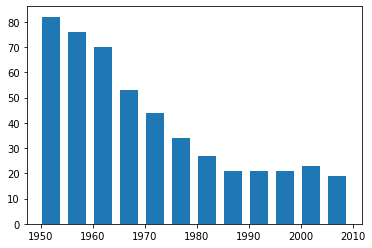

In [72]:
#Source
#https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html

# .bar(using the years that are stored in the index for the x-axis, 'expBelow50' for the y-axis, data = variable with data)
plt.bar('year','expBelow50', data=extra_below50, width = 3.5)

#Only a requirement outside of Jupyter Notebook
plt.show()

In [62]:
below50

year
1952    82
1957    76
1962    70
1967    53
1972    44
1977    34
1982    27
1987    21
1992    21
1997    21
2002    23
2007    19
Name: expBelow50, dtype: int64

In [73]:
#Creating dataframes only consisting of certain countries
denmark = dataset.loc[dataset['country'] == 'Denmark']
mexico = dataset.loc[dataset['country'] == 'Mexico']
china = dataset.loc[dataset['country'] == 'China']

In [74]:
denmark

,country,year,pop,continent,lifeExp,gdpPercap,expBelow50
408,Denmark,1952,4334000,Europe,70.780,9692.385245,False
409,Denmark,1957,4487831,Europe,71.810,11099.659350,False
410,Denmark,1962,4646899,Europe,72.350,13583.313510,False
411,Denmark,1967,4838800,Europe,72.960,15937.211230,False
412,Denmark,1972,4991596,Europe,73.470,18866.207210,False
413,Denmark,1977,5088419,Europe,74.690,20422.901500,False
414,Denmark,1982,5117810,Europe,74.630,21688.040480,False
415,Denmark,1987,5127024,Europe,74.800,25116.175810,False
416,Denmark,1992,5171393,Europe,75.330,26406.739850,False
417,Denmark,1997,5283663,Europe,76.110,29804.345670,False


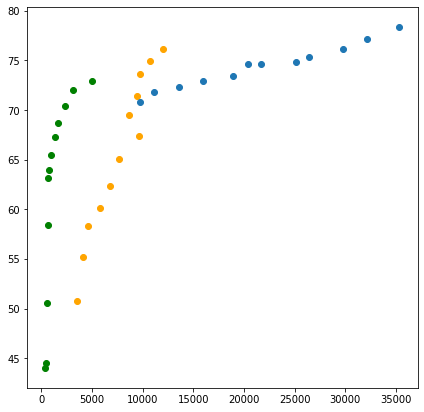

In [78]:
#Source
#https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html

fig = plt.figure(figsize=(7, 7))

plt.scatter('gdpPercap','lifeExp', data=mexico, color = 'orange')
plt.scatter('gdpPercap','lifeExp', data=china, color = 'green')
plt.scatter('gdpPercap','lifeExp', data=denmark)

plt.show()

C:\Users\Matas\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Matas\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Matas\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


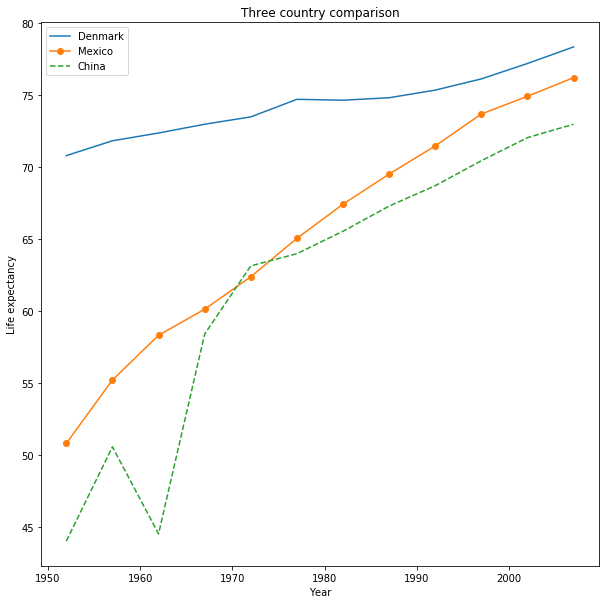

In [79]:
#Source
#https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html

#Changing the size of the figure
plt.figure(figsize=(10, 10))

#Plotting a visualization .plot(x, y, data=data)
plt.plot('year', 'lifeExp', data=denmark)
plt.plot('year', 'lifeExp', data=mexico, marker = 'o')
plt.plot('year', 'lifeExp', data=china, linestyle = 'dashed')

#Giving the visualization a title
plt.title("Three country comparison")

#Giving the x-axis a name
plt.xlabel("Year")

#Giving the y-axis a name
plt.ylabel("Life expectancy")

#Adding a legend
plt.legend(['Denmark', 'Mexico', 'China'])

#Only a requirement outside of Jupyter Notebook
plt.show()

In [80]:
#Creating dataframes of two different years
fifty_two = dataset.loc[dataset['year'] == 1952]
two_k_two = dataset.loc[dataset['year'] == 2002]

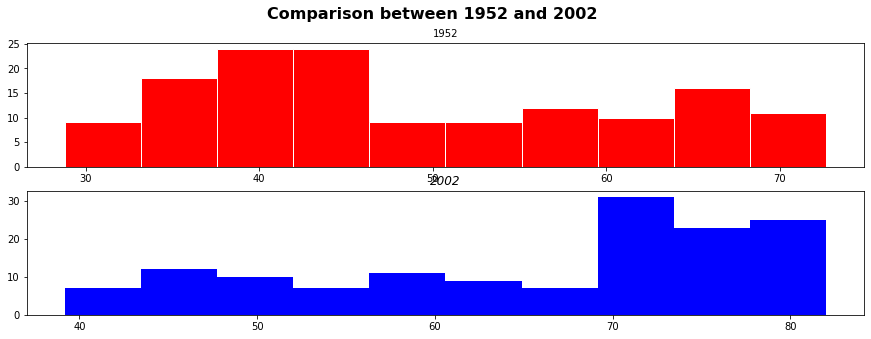

In [85]:
#Source 
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

fig = plt.figure(figsize=(15, 5))
fig.suptitle('Comparison between 1952 and 2002', fontsize = 16, weight= 'bold')


#Why could this be necessary?
bin_range = [30, 40, 50, 60, 70, 80, 90]


#.add_subplot("row count", "column count", position)
ax1 = fig.add_subplot(1,2,1)

ax1.hist('lifeExp', data=fifty_two, color = 'red', edgecolor='white', )
ax1.set_title("1952", fontsize = 10)
#Setting a limit of where the y-axis should start and finish
#ax1.set_ylim(0, 70)



#.add_subplot("row count", "column count", position)
ax2 = fig.add_subplot(1,2,2)

ax2.hist('lifeExp', data=two_k_two, color = 'blue')
ax2.set_title("2002", style = 'italic')



plt.show()

- - - - - 

### Your turn!

<b>E1.</b> Convert the 'year' column to a string type, how do you think this will affect the visualizations? (Try testing it out afterwards) With the Cox text in mind, talk together to identify the different types of data in the set.

<b>E2.</b> How many data units are there in total that have <b>Europe</b> as their "continent" value?

<b>E3.</b> Use a scatter plot to visualize <b>Europe's life expectancy</b> and <b>GDP per capita</b> in the year <b>2007</b>

Afterwards try reflecting on what research question we can imagine answering with this visual? What kind of other visualizations you might want to create, to explore the data?


- - - - - 

#### Additional exercises (good for the mind, but see if you have time)
There are hints below the exercises that you need to highlight with your mouse if you want to see them, otherwise try to google your ideas.



<b>E4.</b> Using the .groupby method, can you find the year which had the <b>smallest/minimum life expectancy value</b> in the whole <b>dataset</b>?

<font color ="white"> You need to use a .lifeExp.min() method in the end</font>

<b>E5.</b> Can you create a new column "roundedLifeExp" that would contain "lifeExp" values rounded up to a whole number?

<font color ="white"> Try Googling "pandas round"</font>

<b>E6.</b> Pick a year and use <b>all available continents</b> in the dataset, to visualize <b>life expectancy</b> and <b>GDP per capita</b> however you see best fit (preferably in a single visualization). What kind of distribution can be seen?

<font color ="white"> .unique(), any year (remember that it is a string now), create a dataframe for each continent and use .scatter() plot to visualize the contents</font>